<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://docs.unidata.ucar.edu/images/logos/unidata_logo_vertical_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

# Satellite Imagery
**Python-AWIPS Tutorial Notebook**

<div style="clear:both"></div>
</div>

---

<div style="float:right; width:250 px"><img src="../images/satellite_imagery_preview.png" alt="Example image of mesoscale GOES imagery" style="height: 300px;"></div>


# Objectives

* Use python-awips to connect to an EDEX server
* Investigate available satellite imagery
* Define and filter request specifically for GOES mesoscale imagery
* Access satellite data in gridded format
* Create rendered images using [Matplotlib](https://matplotlib.org)

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#EDEX-Connection" data-toc-modified-id="EDEX-Connection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDEX Connection</a></span></li><li><span><a href="#Function:-make_map()" data-toc-modified-id="Function:-make_map()-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Function: make_map()</a></span></li><li><span><a href="#Investigate-Available-Data" data-toc-modified-id="Investigate-Available-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Investigate Available Data</a></span><ul class="toc-item"><li><span><a href="#Sources" data-toc-modified-id="Sources-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sources</a></span></li><li><span><a href="#Physical-Elements" data-toc-modified-id="Physical-Elements-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Physical Elements</a></span></li><li><span><a href="#Creating-Entities" data-toc-modified-id="Creating-Entities-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Creating Entities</a></span></li><li><span><a href="#Sectors" data-toc-modified-id="Sectors-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Sectors</a></span></li><li><span><a href="#All-Products" data-toc-modified-id="All-Products-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>All Products</a></span></li></ul></li><li><span><a href="#Render-GOES-East-Mesoscale-Sectors" data-toc-modified-id="Render-GOES-East-Mesoscale-Sectors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Render GOES East Mesoscale Sectors</a></span></li><li><span><a href="#See-Also" data-toc-modified-id="See-Also-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>See Also</a></span><ul class="toc-item"><li><span><a href="#Related-Notebooks" data-toc-modified-id="Related-Notebooks-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Related Notebooks</a></span></li><li><span><a href="#Additional-Documentation" data-toc-modified-id="Additional-Documentation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Additional Documentation</a></span></li></ul></li></ul></div>

## Imports

The imports below are used throughout the notebook.  Note the first import is coming directly from python-awips and allows us to connect to an EDEX server.  The subsequent imports are for data manipulation and visualization. 

In [1]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime, UTC
from pytz import timezone as tz

<a href="#top">Top</a>

---

## EDEX Connection

First we establish a connection to Unidata's public EDEX server.  With that connection made, we can create a [new data request object](http://unidata.github.io/python-awips/api/IDataRequest.html) and set the data type to ***satellite***.

In [2]:
# Create an EDEX data request
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("satellite")

<a href="#top">Top</a>

---

## Function: make_map()

In order to plot more than one image, it's easiest to define common logic in a function.  Here, a new function called **make_map** is defined.  This function uses the [matplotlib.pyplot package (plt)](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html) to create a figure and axis.  The coastlines (continental boundaries) are added, along with lat/lon grids.

In [3]:
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10,12),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

<a href="#top">Top</a>

---

## Investigate Available Data

To see what data are all available, let's look at which optional identifiers satellite data uses.

In [4]:
# Get optional identifiers for satellite datatype
identifiers = set(DataAccessLayer.getOptionalIdentifiers(request))

print("Available Identifiers:")
for id in identifiers:
    if id.lower() == 'datauri':
        continue
    print(" - " + id)

Available Identifiers:
 - source
 - physicalElement
 - sectorID
 - creatingEntity


### Sources

In [5]:
# Show available sources
identifier = "source"
sources = DataAccessLayer.getIdentifierValues(request, identifier)
print(identifier + ":")
print(list(sources))

source:
['GTDO1', 'RAMMB', 'WCDAS', 'RBU', 'UCAR', 'NSOF', 'McIDAS']


### Physical Elements

In [6]:
# Show available physicalElements
identifier = "physicalElement"
elements = DataAccessLayer.getIdentifierValues(request, identifier)
print(identifier + ":")
print(list(elements))

physicalElement:
['Imager 6.7-6.5 micron IR (WV)', 'CH-02-0.64um', 'VMP-151.30hPa', 'CH-07-3.90um', 'CTT', 'VTP-878.60hPa', 'VMP-706.60hPa', 'CH-12-9.61um', 'VMP-496.60hPa', 'SI', 'CH-06-2.25um', 'NTP', 'DVL', 'CL', 'VMP-71.50hPa', 'VTP-931.50hPa', 'VTP-103.00hPa', 'LI', 'VMP-555.20hPa', 'Imager 12 micron IR', 'IceTemp', 'VMP-729.90hPa', 'CF2', 'VTP-407.50hPa', 'HHC', 'CAPE', 'VMP-1014.00hPa', 'VMP-535.20hPa', 'VTP-777.80hPa', 'VTP-535.20hPa', 'VTP-904.90hPa', 'CH-10-7.34um', 'VTP-1014.00hPa', 'ACTP', 'VTP-661.20hPa', 'IceAge3', 'VTP-9.51hPa', 'GLM_Flash_Extent_Density', 'GLM_Flash_Extent_Density_w5u1', 'CF3', 'VMP-852.80hPa', 'CSM', 'TT', 'IceAge8', 'VTP-706.60hPa', 'GLM_Minimum_Flash_Area_w5u1', 'CH-09-6.95um', 'VMP-753.60hPa', 'VMP-878.60hPa', 'VTP-459.70hPa', 'VMP-103.00hPa', 'CH-08-6.19um', 'VTP-151.30hPa', 'VTP-575.50hPa', 'VMP-407.50hPa', 'VMP-661.20hPa', 'VMP-777.80hPa', 'FDC Temp', 'DHR', 'IceMask', 'GLM_Total_Optical_Energy_w5u1_tile', 'CPSD', 'CH-15-12.30um', 'VTP-29.12hPa',

### Creating Entities

In [7]:
# Show available creatingEntities
identifier = "creatingEntity"
creatingEntities = DataAccessLayer.getIdentifierValues(request, identifier)
print(identifier + ":")
print(list(creatingEntities))

creatingEntity:
['GOES-18', 'GEOCOLR', 'GOES-16', 'NEXRCOMP', 'UNIWISC', 'CLDSNOW', 'DBRDUST']


### Sectors

In [8]:
# Show available sectorIDs
identifier = "sectorID"
sectorIDs = DataAccessLayer.getIdentifierValues(request, identifier)
print(identifier + ":")
print(list(sectorIDs))

sectorID:
['WCONUS', 'EMESO-2', 'AKREGI', 'WMESO-1', 'NEXRCOMP', 'WMESO-2', 'WFD', 'AREA3100', 'ECONUS', 'ASREGI', 'Antarctic', 'PRREGI', 'EMESO-1', 'AREA3101', 'AREA0700', 'Arctic', 'AREA0600', 'EFD']


### All Products

In [9]:
# Construct a full satellite product tree
for entity in creatingEntities:
    print(entity)
    request = DataAccessLayer.newDataRequest("satellite")
    request.addIdentifier("creatingEntity", entity)
    availableSectors = DataAccessLayer.getAvailableLocationNames(request)
    availableSectors.sort()
    for sector in availableSectors:
        print(" - " + sector)
        request.setLocationNames(sector)
        availableProducts = DataAccessLayer.getAvailableParameters(request)
        availableProducts.sort()
        for product in availableProducts:
            print("    - " + product)



GOES-18
 - AKREGI
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
    - CH-04-1.38um
    - CH-05-1.61um
    - CH-06-2.25um
    - CH-07-3.90um
    - CH-08-6.19um
    - CH-09-6.95um
    - CH-10-7.34um
    - CH-11-8.50um
    - CH-12-9.61um
    - CH-13-10.35um
    - CH-14-11.20um
    - CH-15-12.30um
    - CH-16-13.30um
 - ASREGI
    - CH-13-10.35um
 - WCONUS
    - ACTP
    - AOD
    - CAPE
    - CF1
    - CF2
    - CF3
    - CF4
    - CF5
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
    - CH-04-1.38um
    - CH-05-1.61um
    - CH-06-2.25um
    - CH-07-3.90um
    - CH-08-6.19um
    - CH-09-6.95um
    - CH-10-7.34um
    - CH-11-8.50um
    - CH-12-9.61um
    - CH-13-10.35um
    - CH-14-11.20um
    - CH-15-12.30um
    - CH-16-13.30um
    - CL
    - CSM
    - CTH
    - Dust
    - FDC Area
    - FDC Power
    - FDC Temp
    - Fire_Mask
    - Fog_Depth
    - IFR_Fog_Prob
    - KI
    - LI
    - LIFR_Fog_Prob
    - LST
    - MVFR_Fog_Prob
    - SI
    - Smoke
    - TCF
    - TP

    - ACTP
    - CAPE
    - CF1
    - CF2
    - CF3
    - CF4
    - CF5
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
    - CH-04-1.38um
    - CH-05-1.61um
    - CH-06-2.25um
    - CH-07-3.90um
    - CH-08-6.19um
    - CH-09-6.95um
    - CH-10-7.34um
    - CH-11-8.50um
    - CH-12-9.61um
    - CH-13-10.35um
    - CH-14-11.20um
    - CH-15-12.30um
    - CH-16-13.30um
    - CL
    - CSM
    - CTH
    - CTT
    - DustHigh
    - DustLow
    - DustMed
    - FDC Area
    - FDC Power
    - FDC Temp
    - Fire_Mask
    - KI
    - LI
    - LST
    - SI
    - SmokeHigh
    - SmokeLow
    - SmokeMed
    - TCF
    - TPW
    - TT
 - PRREGI
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
    - CH-04-1.38um
    - CH-05-1.61um
    - CH-06-2.25um
    - CH-07-3.90um
    - CH-08-6.19um
    - CH-09-6.95um
    - CH-10-7.34um
    - CH-13-10.35um
    - CH-15-12.30um
NEXRCOMP
 - NEXRCOMP
    - DHR
    - DVL
    - EET
    - HHC
    - N1P
    - NTP
UNIWISC
 - AREA0600
    - Imager 6.7-6.5 mi

<a href="#top">Top</a>

---

##  Render GOES East Mesoscale Sectors

Create specific requests defining the datatype, sector, and parameter.  Use the data returned to create plots and print out useful information about the data (metadata).

Latest image available: 2025-02-12 23:56:25 (0.02hr 0.0m ago)
Image grid size: (500, 500)
Image grid extent: [np.float32(-97.02021), np.float32(-82.868774), np.float32(26.70658), np.float32(38.9646)]
Latest image available: 2025-02-12 23:56:55 (0.012777777777777779hr 0.0m ago)
Image grid size: (500, 500)
Image grid extent: [np.float32(-95.20762), np.float32(-80.19988), np.float32(30.912949), np.float32(44.27834)]


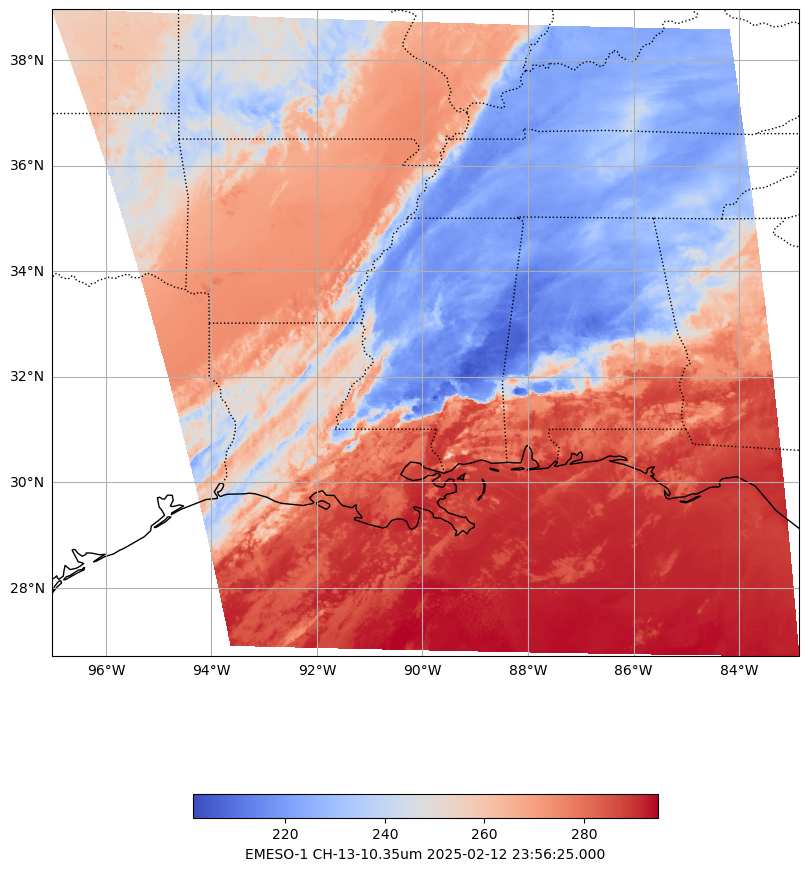

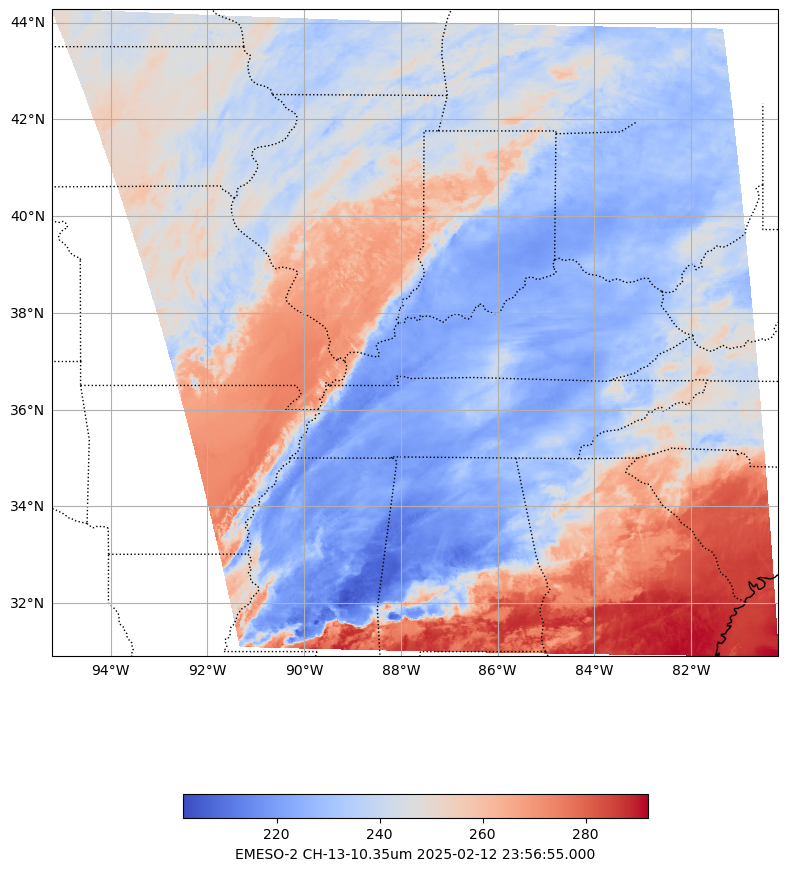

In [10]:
# Define the sectors we want to plot -- here let's use GOES-East mesoscales
sectors = ["EMESO-1","EMESO-2"]

# For each sector render our plot
for i, sector in enumerate(sectors):

    # Create a new request specfically for this data
    request = DataAccessLayer.newDataRequest()
    request.setDatatype("satellite")
    request.setLocationNames(sector)
    # Use Channel 13 as the data we want to render
    request.setParameters("CH-13-10.35um")

    # Filter results by time
    utc = datetime.now(UTC)
    times = DataAccessLayer.getAvailableTimes(request)
    sTime = datetime.strptime(str(times[-1]),'%Y-%m-%d %H:%M:%S')
    sTime = sTime.replace(tzinfo=tz('UTC'))
    hourdiff = utc - sTime
    hours,days = hourdiff.seconds/3600,hourdiff.days
    minute = str((hourdiff.seconds - (3600 * hours)) / 60)
    offsetStr = ''
    if hours > 0:
        offsetStr += str(hours) + "hr "
    offsetStr += str(minute) + "m ago"
    if days > 1:
        offsetStr = str(days) + " days ago"

    response = DataAccessLayer.getGridData(request, [times[-1]])
    grid = response[0]
    data = grid.getRawData()
    
    # Define the bounding box for the plot
    lons,lats = grid.getLatLonCoords()
    bbox = [lons.min(), lons.max(), lats.min(), lats.max()]

    # Print out the time of the image we're using and where the data is
    print("Latest image available: "+str(times[-1]) + " ("+offsetStr+")")
    print("Image grid size: " + str(data.shape))
    print("Image grid extent: " + str(list(bbox)))

    # Create the new plots
    fig, ax = make_map(bbox=bbox)
    states = cfeat.NaturalEarthFeature(category='cultural',
                                        name='admin_1_states_provinces_lines',
                                        scale='50m', facecolor='none')
    ax.add_feature(states, linestyle=':')
    cs = ax.pcolormesh(lons, lats, data, cmap='coolwarm')
    cbar = fig.colorbar(cs, shrink=0.6, orientation='horizontal')
    # Set the colorbar label
    cbar.set_label(sector + " " + grid.getParameter() + " " \
    + str(grid.getDataTime().getRefTime()))

<a href="#top">Top</a>

---

## See Also

### Related Notebooks

- [GOES CIRA Product Writer](http://unidata.github.io/python-awips/examples/generated/GOES_CIRA_Product_Writer.html)

### Additional Documentation


**python-awips**

- [DataAccessLayer.changeEDEXHost()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.changeEDEXHost)
- [DataAccessLayer.newDataRequest()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.newDataRequest)
- [DataAccessLayer.getAvailableLocationNames()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.getAvailableLocationNames)
- [DataAccessLayer.getOptionalIdentifiers()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.getOptionalIdentifiers)
- [DataAccessLayer.getIdentifierValues()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.getIdentifierValues)
- [DataAccessLayer.getAvailableTimes()](http://unidata.github.io/python-awips/api/DataAccessLayer.html#awips.dataaccess.DataAccessLayer.getAvailableTimes)
- [IDataRequest](http://unidata.github.io/python-awips/api/IDataRequest.html)

**matplotlib**

- [matplotlib.pyplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
- [matplotlib.pyplot.axes()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html)
- [matplotlib.pyplot.figure()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

<a href="#top">Top</a>

---